## Business Task

<p>As we have seen in the current world. Sectors are so competitive and this reason has increased pressure on people who work for any companies.</p>
<p>Unachievable business goals and risk of becoming unemployed  have raised stress level of employees.</p>
<p>In this project We have a dataset which has employee information related to absenteeism. We will explore our dataset and try to find pattern and make a prediction who has the potential to absence.</p>

#### Purpose of the Business

- Based on what information should we predict whether an employee is expected to be absent ot not ?
- Exploring whether a presenting certain characteristics is expected to be away from work at some point in time or not ?
- We want to know for how many working hours an employee could be away from work ?
- How far they live from their workplace ?
- How many children and pets they have ?
- Do they have higher education ?

We will try to find the question above and get insight from our data.

### Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Variable Description

1. ID : Individual identification
2. Reason for absence
3. Date : Date
4. Transportation expense 
5. Distance from Residence to Work (kilometers)
6. Age 
7. Work load Average/day
8. Body Mass Index
9. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
10. Children
11. Pets
12. Absenteeism time in hours (target)

In [3]:
raw_csv_data = pd.read_csv("Absenteeism_data.csv")

In [4]:
raw_csv_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


- **Creating a copy of original dataset named df**

In [5]:
df = raw_csv_data.copy()

#### Basic Understanding Data

In [6]:
df.sample(5) # Get the 5 records randomly with sample method

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
413,20,28,07/04/2017,260,50,36,239.409,23,1,4,0,3
638,3,27,20/03/2018,179,51,38,222.196,31,1,0,0,2
613,33,23,27/02/2018,248,25,47,264.249,32,1,2,1,2
601,17,23,16/02/2018,179,22,40,264.249,22,2,2,0,2
431,20,28,12/05/2017,260,50,36,246.074,23,1,4,0,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


- As we have seen above there is no missing values in our dataset

#### Dropping ID Columns 

- ID Column indicates precisely who has been away during working hours. 
- Since this information does not improve our analysis in any way

In [8]:
df.drop("ID",axis =1,inplace =True)

In [9]:
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


### "Reason for Absence"

In [10]:
df["Reason for Absence"].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

Text(0, 0.5, 'Numbers')

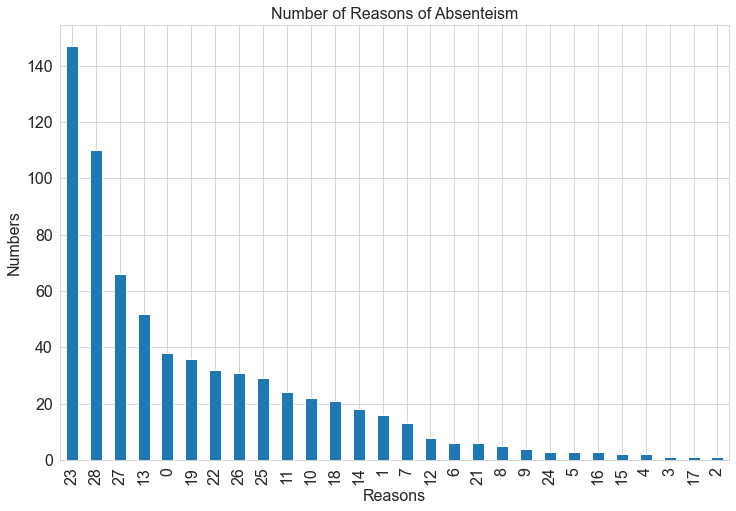

In [20]:
plt.figure(figsize=(12,8))
df["Reason for Absence"].value_counts().plot(kind="bar",fontsize=16)
plt.title('Number of Reasons of Absenteism',fontsize=16)
plt.xlabel('Reasons',fontsize=16)
plt.ylabel('Numbers',fontsize=16)

- We see that Reason 23,28,27 occured more compared to others

- We see that there is a missing value = 20 
- We need to find out if we reaaly have no reason number 20 or it is randomly missing ?

### Encoding Categorigal Value to Dummy Variable

In [21]:
reason_columns = pd.get_dummies(df["Reason for Absence"])

In [22]:
reason_columns.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


- Now We can see that each column represents a reason as a dummy variable

#### To avoid potential  multicollinearity issues ,we will drop first column Reason 0 

In [23]:
reason_columns = pd.get_dummies(df["Reason for Absence"],drop_first=True)

In [24]:
reason_columns.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### Grouping the Reasons for Absence

In [25]:
reason_1 = reason_columns.loc[:,1:14].max(axis=1)
reason_2 = reason_columns.loc[:,15:17].max(axis = 1)
reason_3 = reason_columns.loc[:,18:21].max(axis = 1)
reason_4 = reason_columns.loc[:,22:].max(axis = 1)

#### Dropping Reason for Absence 

In [26]:
df.drop(["Reason for Absence"],inplace = True,axis = 1)

In [27]:
df = pd.concat([df,reason_1,reason_2,reason_3,reason_4],axis = 1) 

In [28]:
df = df.rename(columns={0:"reason_1",1:"reason_2",2:"reason_3",3:"reason_4"}) # change the column name 

In [29]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_1,reason_2,reason_3,reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


### Reorder the Column Names

In [30]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'reason_1',
       'reason_2', 'reason_3', 'reason_4'], dtype=object)

In [31]:
reordered_column_names = [ 'reason_1','reason_2', 'reason_3', 'reason_4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [32]:
df = df[reordered_column_names]

In [33]:
df.head(6)

,reason_1,reason_2,reason_3,reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2
5,0,0,0,1,10/07/2015,179,51,38,239.554,31,1,0,0,2


### Creating Checkpoint

In [34]:
df_reason_mod = df.copy()

### "Date" Column

In [35]:
type(df_reason_mod["Date"][0]) # it is string format 

str

- We need to change data type from string to datetime

In [36]:
df_reason_mod["Date"] = pd.to_datetime(df_reason_mod["Date"], format = "%d/%m/%Y")

In [37]:
df_reason_mod["Date"][:6] ## yyyy-mm-dd format

0   2015-07-07
1   2015-07-14
2   2015-07-15
3   2015-07-16
4   2015-07-23
5   2015-07-10
Name: Date, dtype: datetime64[ns]

In [38]:
df_reason_mod.info() # We see that Date type has changed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   reason_1                   700 non-null    uint8         
 1   reason_2                   700 non-null    uint8         
 2   reason_3                   700 non-null    uint8         
 3   reason_4                   700 non-null    uint8         
 4   Date                       700 non-null    datetime64[ns]
 5   Transportation Expense     700 non-null    int64         
 6   Distance to Work           700 non-null    int64         
 7   Age                        700 non-null    int64         
 8   Daily Work Load Average    700 non-null    float64       
 9   Body Mass Index            700 non-null    int64         
 10  Education                  700 non-null    int64         
 11  Children                   700 non-null    int64         
 12  Pets    

#### Extracting Month Value to a new column

In [39]:
df_reason_mod["Date"][1]

Timestamp('2015-07-14 00:00:00')

In [40]:
df_reason_mod["Date"][1].month

7

In [41]:
df_reason_mod["Month Value"] = df_reason_mod["Date"].apply(lambda x : x.month)

In [42]:
df_reason_mod["Month Value"][:5]

0    7
1    7
2    7
3    7
4    7
Name: Month Value, dtype: int64

#### Extracting Day of the Week to a new column

In [43]:
df_reason_mod["Day of the Week"] = df_reason_mod["Date"].apply(lambda x : x.weekday())

In [44]:
df_reason_mod["Day of the Week"][:5]

0    1
1    1
2    2
3    3
4    3
Name: Day of the Week, dtype: int64

In [45]:
df_reason_mod.head()

,reason_1,reason_2,reason_3,reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


In [46]:
df_reason_mod.drop("Date",inplace = True,axis = 1)

In [47]:
df_reason_mod.columns.values

array(['reason_1', 'reason_2', 'reason_3', 'reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month Value',
       'Day of the Week'], dtype=object)

In [48]:
df_reason_mod = df_reason_mod[['reason_1', 'reason_2', 'reason_3', 'reason_4','Month Value','Day of the Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']]

In [49]:
df_reason_mod.head()

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


### Transportation Expense

In [50]:
type(df_reason_mod["Transportation Expense"][0]) ## it is integer and $ 

numpy.int64

### Distance to Work

In [51]:
type(df_reason_mod["Distance to Work"][0]) 

numpy.int64

### Age

In [52]:
type(df_reason_mod["Age"][0]) 

numpy.int64

### Daily Work Load Average

In [53]:
type(df_reason_mod["Daily Work Load Average"][0]) 

numpy.float64

### Body Mass Index

In [54]:
type(df_reason_mod["Body Mass Index"][0])

numpy.int64

### Education & Pets & Children

- Children and pets indicate how many kids or pets a person has precisely,whereas education is a feature where the numbers do not have numeric meaning.
- Therefore we will leave the last two columns untouched.

In [55]:
df_reason_mod["Education"].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

1- High School
2- Graduate
3- Post Graduate
4- a master or a doctor

#### Since Education column is categorical integer We need to transform Education into a dummy variable

In [56]:
df_reason_mod["Education"] = df_reason_mod["Education"].map({1:0,2:1,3:1,4:1})

In [57]:
df_reason_mod["Education"].unique()

array([0, 1], dtype=int64)

In [58]:
df_reason_mod["Pets"].value_counts()

0    439
1    132
2     92
4     29
5      5
8      3
Name: Pets, dtype: int64

In [59]:
df_reason_mod["Children"].value_counts()

0    285
1    213
2    146
4     42
3     14
Name: Children, dtype: int64

### Final Checkpoint

In [60]:
df_preprocessed = df_reason_mod.copy()

In [61]:
df_preprocessed.head()

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [62]:
df_preprocessed.to_csv("Preprocessed.csv",index = False)